In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def total_system(t, y, w_env,_):
    N = len(w_env)
    gw = 2.52/np.sqrt(N)
    b_freq = 0


    dcw = []
    b = y[0] + 1j * y[1]

    db = -1j*b_freq*b

    for ii, ww in enumerate(w_env):
        cw = y[2*ii+2]+1j*y[2*ii+3]
        db = db+gw*cw
        dcw.append(-np.conj(gw)*b-1j*ww*cw)

    return [
        db.real, db.imag,
        *[item for num in dcw for item in (num.real, num.imag)]
    ]

In [55]:
N=1000

w_env = np.linspace(-20, 20, N)
array_length = N * 2 + 2
y0 = [1] + [0] * (array_length-1)
t_span = (0, 10)
t_eval = np.linspace(*t_span, 10000)

sol = solve_ivp(total_system, t_span, y0, args=(w_env, _), t_eval=t_eval, method='RK45')
y = sol.y
b = y[0] + 1j * y[1]


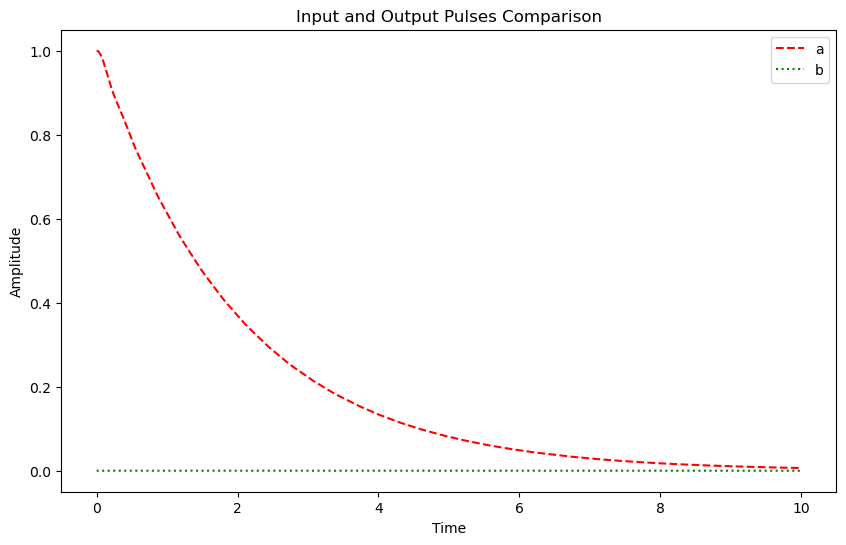

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(t_eval, y[0], label='a', color='red', linestyle='--')
plt.plot(t_eval, y[1], label='b', color='green', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Output Pulses Comparison')
plt.grid(False)
plt.legend()
plt.show()

In [57]:
y[0][200]/y[0][0]

0.9165340100763092

In [58]:
y[0][400]/y[0][200]

0.9075240222394833

In [59]:
y[0][600]/y[0][400]

0.9005240690571081

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 파라미터 정의
def param_squeezing(pump, b_freq_p, a_freq, b_freq, b_loss, J0):
    beta = pump/b_freq_p
    rp = (1/4) * np.log((1 + beta) / (1 - beta))
    bs_freq = np.sqrt(1-beta**2)*b_freq_p + b_freq - b_freq_p
    a_freq_bs = a_freq - bs_freq
    noise = (2 * np.sinh(rp)**2 * b_loss)
    Js = np.cosh(rp)*J0

    return beta, rp, bs_freq, a_freq_bs, noise, Js

def param_reproduce(kappa_ext, delta, J0, b_freq_p, pump):
    kappa = 1
    a_freq = delta
    b_freq = delta
    a_loss = kappa
    b_loss = kappa
    ex1 = kappa_ext
    ex2 = kappa_ext

    param_squeeze = param_squeezing(pump, b_freq_p, a_freq, b_freq, b_loss, J0)

    return a_freq, b_freq, a_loss, b_loss, ex1, ex2, J0, param_squeeze

In [188]:
params = param_reproduce(kappa_ext=0.99,delta=0,J0=0.99,b_freq_p=10.3,pump=10)
#params = param_reproduce(kappa_ext=0.99,delta=2.62,J0=2.8,b_freq_p=15,pump=13)
is_forward = False

0번째 반복까지 경과 시간: 0.02초


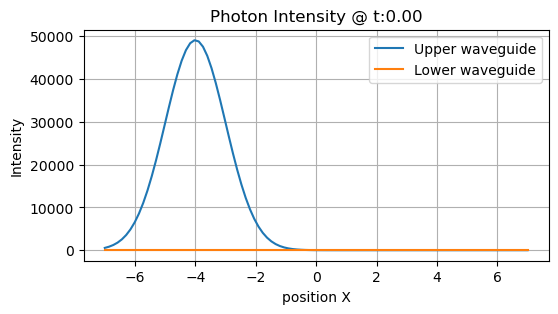

1000번째 반복까지 경과 시간: 19.77초


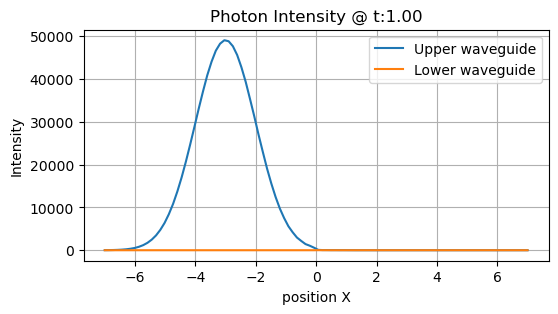

2000번째 반복까지 경과 시간: 52.65초


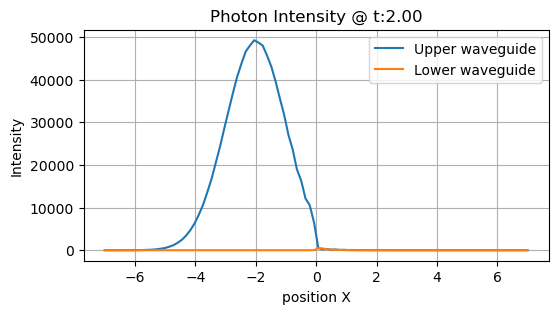

3000번째 반복까지 경과 시간: 84.17초


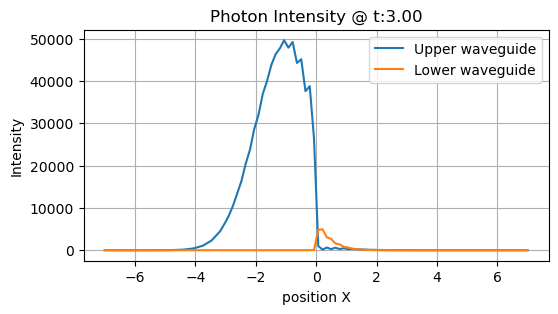

4000번째 반복까지 경과 시간: 114.57초


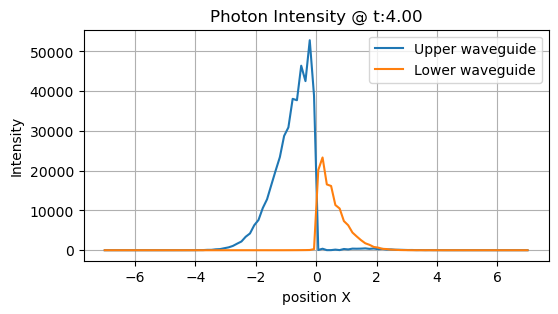

5000번째 반복까지 경과 시간: 145.87초


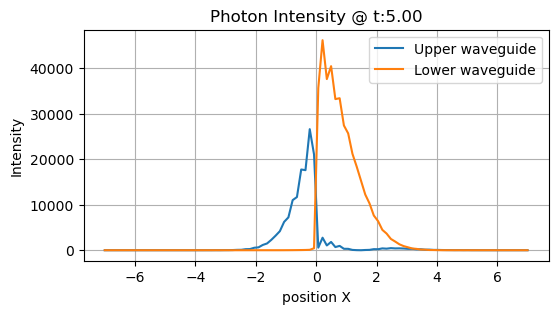

6000번째 반복까지 경과 시간: 175.33초


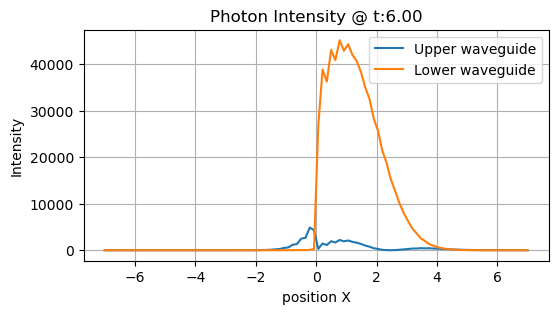

7000번째 반복까지 경과 시간: 204.74초


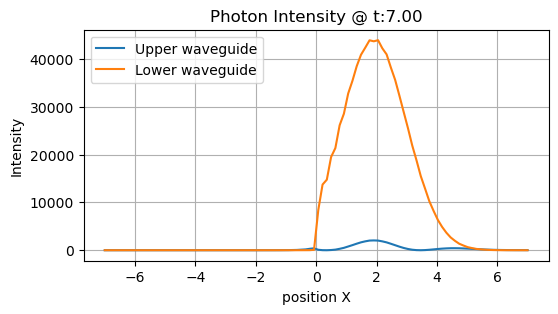

8000번째 반복까지 경과 시간: 221.54초


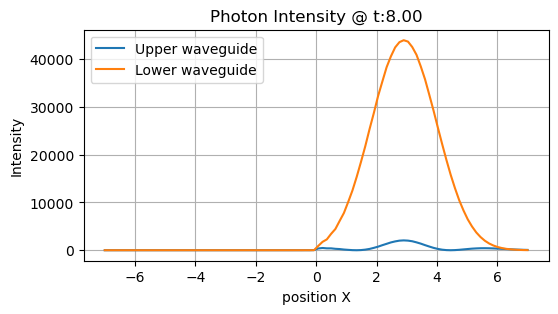

9000번째 반복까지 경과 시간: 238.22초


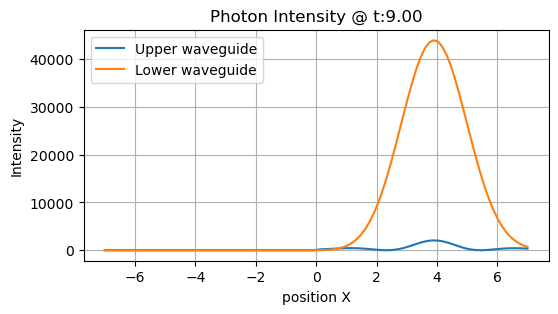

10000번째 반복까지 경과 시간: 255.09초


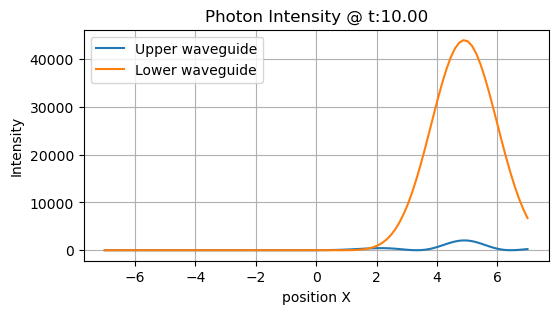

11000번째 반복까지 경과 시간: 278.44초


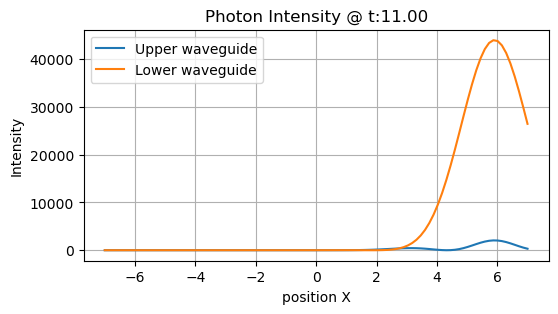

12000번째 반복까지 경과 시간: 308.84초


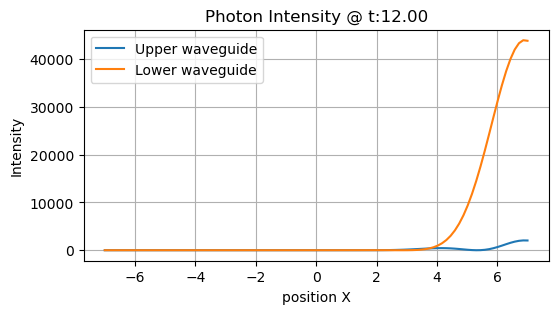

13000번째 반복까지 경과 시간: 339.36초


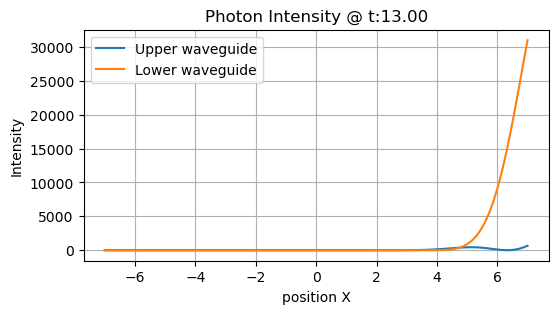

14000번째 반복까지 경과 시간: 370.08초


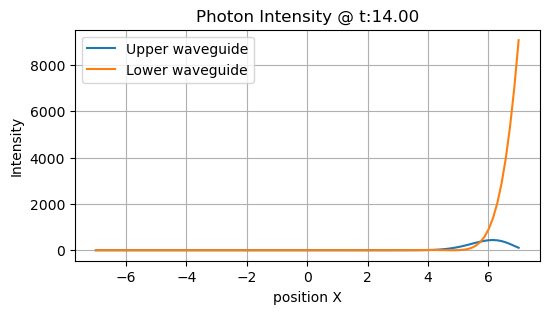

15000번째 반복까지 경과 시간: 400.47초


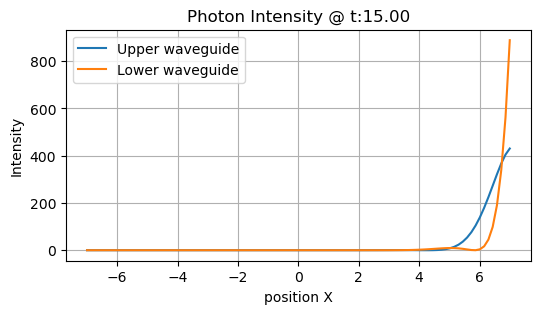

16000번째 반복까지 경과 시간: 431.09초


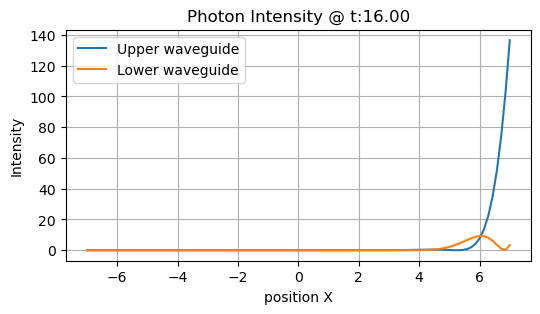

17000번째 반복까지 경과 시간: 461.86초


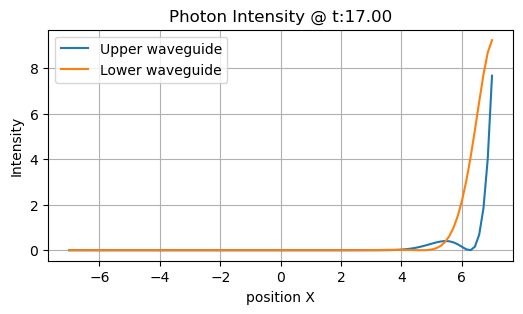

18000번째 반복까지 경과 시간: 492.62초


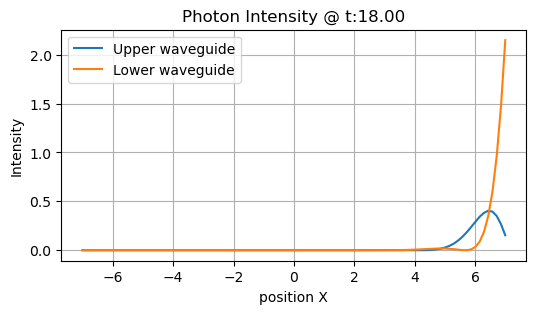

19000번째 반복까지 경과 시간: 523.03초


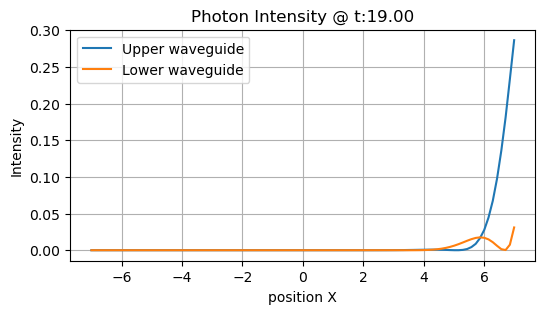

20000번째 반복까지 경과 시간: 553.94초


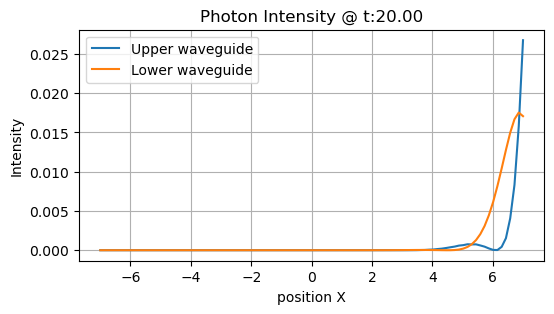

21000번째 반복까지 경과 시간: 584.59초


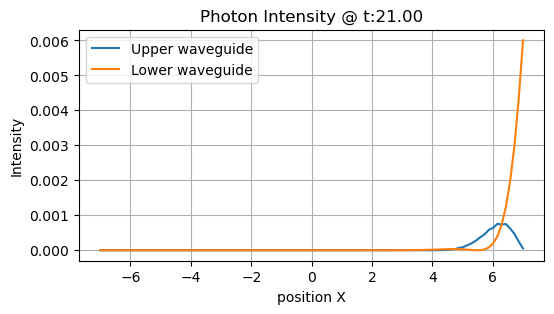

22000번째 반복까지 경과 시간: 615.26초


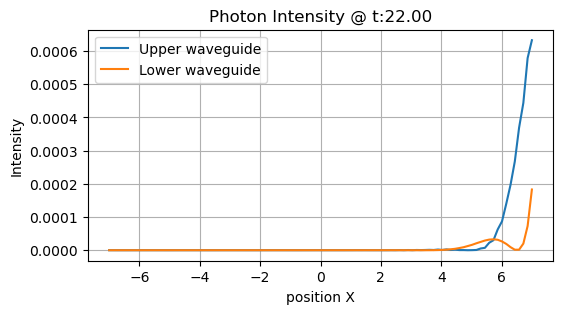

23000번째 반복까지 경과 시간: 645.71초


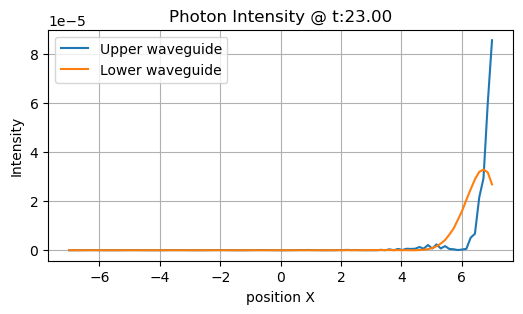

24000번째 반복까지 경과 시간: 676.76초


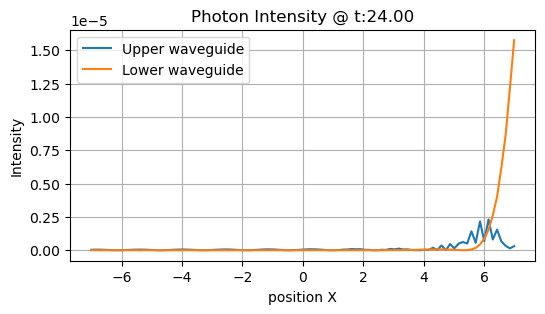

25000번째 반복까지 경과 시간: 706.89초


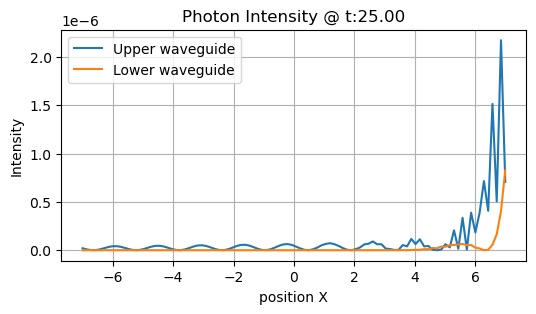

26000번째 반복까지 경과 시간: 738.04초


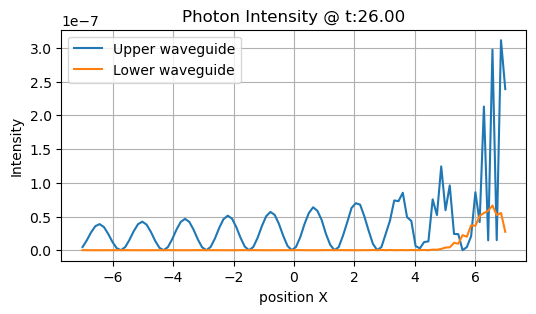

27000번째 반복까지 경과 시간: 768.68초


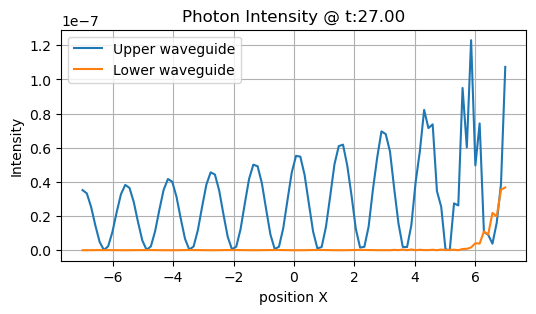

28000번째 반복까지 경과 시간: 799.77초


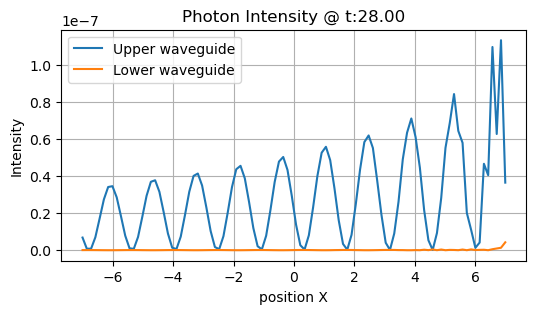

29000번째 반복까지 경과 시간: 831.32초


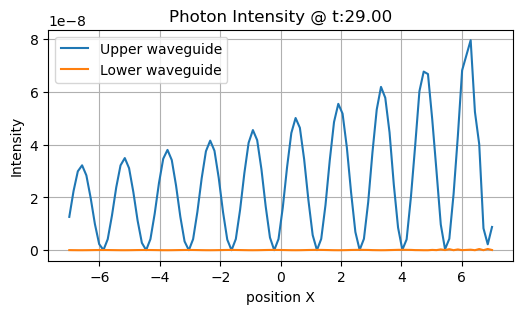

In [192]:
a_freq, b0_freq, a_loss, b_loss, ex1, ex2, J0, param_squeeze = params
beta, rp, bs_freq, a_freq_bs, noise, Js = param_squeeze
if is_forward:
    b_freq = bs_freq
    J = Js
else:
    b_freq = b0_freq
    J = J0

x0 = -4
sigma = 1
win = 10

k_number = 5000
k_range = 20
k_list = np.linspace(-k_range, k_range, k_number)
gk = np.sqrt(2*k_range*ex1/(k_number*np.pi))

t_number = 15*1000
t_range = 15
t_list = np.linspace(0, t_range, t_number)
dt = t_list[1]-t_list[0]

a=0
b=0
c0 = []
for jj, k in enumerate(k_list):
    c0.append(np.exp(-sigma**2 * k**2 - 1j*k*x0))
c0 = np.array(c0)


x_number = 100
x_range = 7
x_list = np.linspace(-x_range, x_range, x_number)


import time
start_time = time.time()
a_integral = 0 * c0
b_integral = 0 * c0

for ii, t in enumerate(t_list):
    da=0
    for jj, k in enumerate(k_list):
        da += c0[jj]*np.exp(-1j*k*t)
        a_integral[jj] += np.exp(+1j*k*t)*a*dt
        b_integral[jj] += np.exp(+1j*k*t)*b*dt


    da *= gk
    da += -1j*a_freq*a-1j*b*J-ex1*a
    db = -1j*b_freq*b-1j*a*J-ex2*b

    a += da * dt
    b += db * dt


    if ii % 1000 == 0:
        current_time = time.time()
        elapsed = current_time - start_time
        print(f"{ii}번째 반복까지 경과 시간: {elapsed:.2f}초")

    if ii % 1000 == 0:
        I_at_t = np.zeros(x_number, dtype=np.complex128)
        I_tilde_at_t = np.zeros(x_number, dtype=np.complex128)
        for jj, k in enumerate(k_list):
            k_org = win + k
            ck = c0[jj]*np.exp(-1j*k*t)-gk*a_integral[jj]*np.exp(-1j*k*t)
            cck = -gk*b_integral[jj]*np.exp(-1j*k*t)
            I_at_t += ck*np.exp(1j*k_org*x_list)
            I_tilde_at_t += cck*np.exp(1j*k_org*x_list)

        I_at_t = np.abs(I_at_t)**2
        I_tilde_at_t = np.abs(I_tilde_at_t)**2

        plt.figure(figsize=(6, 3))
        plt.plot(x_list, I_at_t, label="Upper waveguide")
        plt.plot(x_list, I_tilde_at_t, label="Lower waveguide")
        plt.xlabel("position X")
        plt.ylabel("Intensity")
        plt.title("Photon Intensity @ "+f"t:{t:.2f}")
        plt.legend()
        plt.grid(True)
        #plt.savefig('figs/forward_noise.png')
        plt.show()


In [ ]:
sum = 0
NN=1000
AAA = 50
A = 2
B = 10000
k_list = np.linspace(-AAA, AAA, NN)
t_list = np.linspace(0, A, B)
for t in t_list:
    for k in k_list:
        sum += np.exp(-1j*k*t)

sum*(AAA/NN/np.pi)*(A/B)

In [136]:
sum=0
t=0.05
for k in k_list:
    sum += np.exp(-1j*k*t)
sum/NN

(0.2383478259421722+5.88418203051333e-17j)